# Diferencias Finitas Método Explícito


$$u_t(x,t) = \alpha^{2}u_{xx}(x,t), x\in[0,L], t\ge0$$

- Condiciones de frontera:
$$u(0,t) = u(L,t) = 0,t>0$$
- Condiciones iniciales:
$$u(x,0) = g(x),x\in[0,L]$$
- Ejemplo:
$$u(x,0) = \sin(\pi x),x\in[0,L] $$
- Solución:  
$$u(x,t) = e^{-\pi^{2}t}\sin(\pi x)$$

In [34]:
using PlotlyJS
using LinearAlgebra
using Printf

In [35]:
include("utils/functions.jl")

crow_method (generic function with 2 methods)

## Solución Exacta

In [36]:
U(x,t) = exp(-π^2*t)*sin.(π*x)

U (generic function with 1 method)

In [37]:
x = LinRange(0.0, 1,11)
t = 0.5
U(x,t)

11-element Vector{Float64}:
 0.0
 0.0022224141785126745
 0.00422728297276244
 0.005818355856425859
 0.006839887529993324
 0.007191883355826368
 0.006839887529993325
 0.005818355856425859
 0.004227282972762441
 0.0022224141785126754
 8.807516931553887e-19

## Metodo Explicito

In [38]:
a,b = 0,1
t_min, t_max = 0,0.5

ci = x -> sin.(π*x)

xn = 10
tn  = 1000

h = (b-a)/xn
k = (t_max-t_min)/tn 
α = 1

λ = k*α^2/h^2

di = fill(λ,xn-2)
d  = fill(1-2*λ,xn-1)
ds = fill(λ,xn-2)
A  = Tridiagonal(di, d, ds)  

S = zeros(tn+1,xn+1)
S[:,1] = zeros(tn+1)
S[:,xn+1] = zeros(tn+1)
S[1,2:xn] = ci(LinRange(a+h, b-h, xn-1))

for i in 2:tn+1
    S[i,2:xn] = A*S[i-1,2:xn]
end

for (index, value) in enumerate(S[tn+1,:])
    x =  a + (index-1)*h
    @printf("x_%d = %.2f \t U(%.2f,%.2f) = %.2e \n", index, x, x, t_max, value)
end

# u_values = U(x,t)
# println("x \t\t S(x,t) \t\t\t U(x,t) \t\t\t E(x,t) ")
# for (index, value) in enumerate(S[tn+1,:])
#     x_value = a + (index-1)*h
#     error = abs(u_values[index] - value)
#     @printf("x_%d = %.2f \t S(%.2f,%.2f) = %.2e \t U(%.2f,%.2f) = %.2e \t E(%.2f,%.2f) = %.2e \n", index-1, x_value, x_value, t_max, value, x_value, t_max,u_values[index],x_value, t_max,error)
# end

x_1 = 0.00 	 U(0.00,0.50) = 0.00e+00 
x_2 = 0.10 	 U(0.10,0.50) = 2.29e-03 
x_3 = 0.20 	 U(0.20,0.50) = 4.35e-03 
x_4 = 0.30 	 U(0.30,0.50) = 5.99e-03 
x_5 = 0.40 	 U(0.40,0.50) = 7.04e-03 
x_6 = 0.50 	 U(0.50,0.50) = 7.40e-03 
x_7 = 0.60 	 U(0.60,0.50) = 7.04e-03 
x_8 = 0.70 	 U(0.70,0.50) = 5.99e-03 
x_9 = 0.80 	 U(0.80,0.50) = 4.35e-03 
x_10 = 0.90 	 U(0.90,0.50) = 2.29e-03 
x_11 = 1.00 	 U(1.00,0.50) = 0.00e+00 


## Gráfico


## Método Implicito

In [39]:
a,b = 0,1
t_min, t_max = 0,0.5

ci = x -> sin.(π*x)

xn = 10
tn  = 1000

h = (b-a)/xn
k = (t_max-t_min)/tn 
α = 1

λ = k*α^2/h^2

di = fill(-λ,xn-2)
d  = fill(1+2*λ,xn-1)
ds = fill(-λ,xn-2)
A  = Tridiagonal(di, d, ds)  

S = zeros(tn+1,xn+1)
S[:,1] = zeros(tn+1)
S[:,xn+1] = zeros(tn+1)
S[1,2:xn] = ci(LinRange(a+h, b-h, xn-1))
S

for i in 2:tn+1
    S[i,2:xn] = A\S[i-1,2:xn]
end

for (index, value) in enumerate(S[tn+1,:])
    x =  a + (index-1)*h
    @printf("x_%d = %.2f \t U(%.2f,%.2f) = %.2e \n", index, x, x, t_max, value)
end

x_1 = 0.00 	 U(0.00,0.50) = 0.00e+00 
x_2 = 0.10 	 U(0.10,0.50) = 2.34e-03 
x_3 = 0.20 	 U(0.20,0.50) = 4.45e-03 
x_4 = 0.30 	 U(0.30,0.50) = 6.13e-03 
x_5 = 0.40 	 U(0.40,0.50) = 7.21e-03 
x_6 = 0.50 	 U(0.50,0.50) = 7.58e-03 
x_7 = 0.60 	 U(0.60,0.50) = 7.21e-03 
x_8 = 0.70 	 U(0.70,0.50) = 6.13e-03 
x_9 = 0.80 	 U(0.80,0.50) = 4.45e-03 
x_10 = 0.90 	 U(0.90,0.50) = 2.34e-03 
x_11 = 1.00 	 U(1.00,0.50) = 0.00e+00 


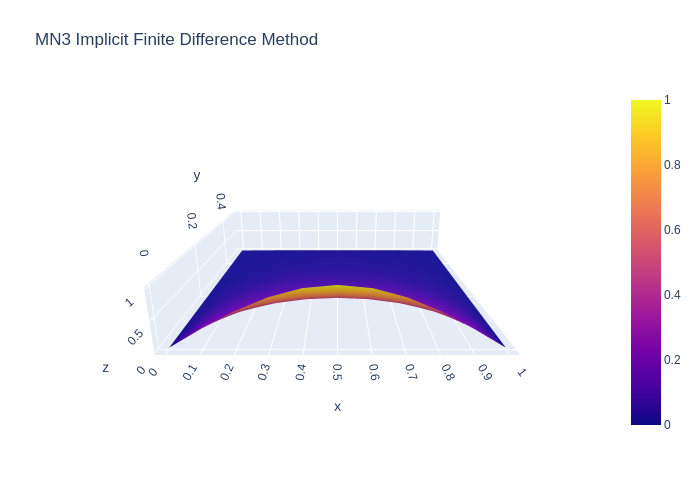

In [40]:
x = LinRange(a, b, xn+1)
y = LinRange(t_min, t_max, tn+1)
Z = vector_de_vectores = [vec(S[i, :]) for i in 1:size(S, 1)]
layout = Layout(
    title="MN3 Implicit Finite Difference Method",
    autosize=false,
    width=800,
    height=400,
    margin=attr(l=65, r=50, b=65, t=90),
    scene=attr(
            xaxis_nticks=20,
            zaxis_nticks=4,
            camera_eye=attr(x=0, y=-1.5, z=0.5),
            aspectratio=attr(x=1, y=1, z=0.2)
        )
)
Plot(surface(x=x, y=y, z=Z), layout)

## Implicit Crow Method version

In [41]:
a,b = 0,1
t_min, t_max = 0,0.5

ci = x -> sin.(π*x)

xn = 10
tn  = 1000

h = (b-a)/xn
k = (t_max-t_min)/tn 
α = 1

λ = k*α^2/h^2

di = fill(-λ,xn-2)
d  = fill(1+2*λ,xn-1)
ds = fill(-λ,xn-2)
A  = Tridiagonal(di, d, ds)  

S = zeros(tn+1,xn+1)
S[:,1] = zeros(tn+1)
S[:,xn+1] = zeros(tn+1)
S[1,2:xn] = ci(LinRange(a+h, b-h, xn-1))
S

for i in 2:tn+1
    S[i,2:xn] = crow_method(A,S[i-1,2:xn])
end

for (index, value) in enumerate(S[tn+1,:])
    x =  a + (index-1)*h
    @printf("x_%d = %.2f \t U(%.2f,%.2f) = %.2e \n", index, x, x, t_max, value)
end

x_1 = 0.00 	 U(0.00,0.50) = 0.00e+00 
x_2 = 0.10 	 U(0.10,0.50) = 2.34e-03 
x_3 = 0.20 	 U(0.20,0.50) = 4.45e-03 
x_4 = 0.30 	 U(0.30,0.50) = 6.13e-03 
x_5 = 0.40 	 U(0.40,0.50) = 7.21e-03 
x_6 = 0.50 	 U(0.50,0.50) = 7.58e-03 
x_7 = 0.60 	 U(0.60,0.50) = 7.21e-03 
x_8 = 0.70 	 U(0.70,0.50) = 6.13e-03 
x_9 = 0.80 	 U(0.80,0.50) = 4.45e-03 
x_10 = 0.90 	 U(0.90,0.50) = 2.34e-03 
x_11 = 1.00 	 U(1.00,0.50) = 0.00e+00 


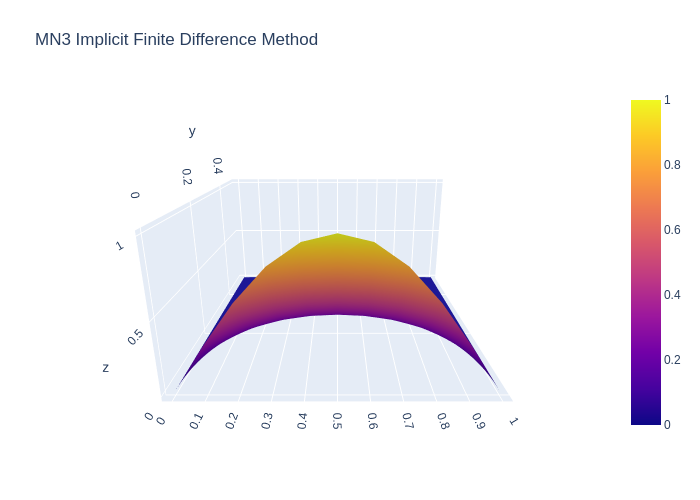

In [42]:
x = LinRange(a, b, xn+1)
y = LinRange(t_min, t_max, tn+1)
Z = vector_de_vectores = [vec(S[i, :]) for i in 1:size(S, 1)]
layout = Layout(
    title="MN3 Implicit Finite Difference Method",
    autosize=false,
    width=800,
    height=400,
    margin=attr(l=65, r=50, b=65, t=90),
    scene=attr(
            xaxis_nticks=20,
            zaxis_nticks=4,
            camera_eye=attr(x=0, y=-1.5, z=0.5),
            aspectratio=attr(x=1, y=1, z=0.5)
        )
)
Plot(surface(x=x, y=y, z=Z), layout)

## Método de Crank - Nicholson

In [47]:
a,b = 0,1
t_min, t_max = 0,0.5

ci = x -> sin.(π*x)

xn = 10
tn  = 50

h = (b-a)/xn
k = (t_max-t_min)/tn 
α = 1

λ = k*α^2/h^2

Adi = fill(-λ/2,xn-2)
Ad  = fill(1+λ,xn-1)
Ads = fill(-λ/2,xn-2)
A  = Tridiagonal(Adi, Ad, Ads)  

Bdi = fill(λ/2,xn-2)
Bd  = fill(1-λ,xn-1)
Bds = fill(λ/2,xn-2)
B  = Tridiagonal(Bdi, Bd, Bds)  

S = zeros(tn+1,xn+1)
S[:,1] = zeros(tn+1)
S[:,xn+1] = zeros(tn+1)
S[1,2:xn] = ci(LinRange(a+h, b-h, xn-1))
S

for i in 2:tn+1
    #S[i,2:xn] = A\(B*S[i-1,2:xn])
    S[i,2:xn] = crow_method(A,B*S[i-1,2:xn])
end

for (index, value) in enumerate(S[tn+1,:])
    x =  a + (index-1)*h
    @printf("x_%d = %.2f \t U(%.2f,%.2f) = %.2e \n", index, x, x, t_max, value)
end

x_1 = 0.00 	 U(0.00,0.50) = 0.00e+00 
x_2 = 0.10 	 U(0.10,0.50) = 2.31e-03 
x_3 = 0.20 	 U(0.20,0.50) = 4.38e-03 
x_4 = 0.30 	 U(0.30,0.50) = 6.03e-03 
x_5 = 0.40 	 U(0.40,0.50) = 7.09e-03 
x_6 = 0.50 	 U(0.50,0.50) = 7.46e-03 
x_7 = 0.60 	 U(0.60,0.50) = 7.09e-03 
x_8 = 0.70 	 U(0.70,0.50) = 6.03e-03 
x_9 = 0.80 	 U(0.80,0.50) = 4.38e-03 
x_10 = 0.90 	 U(0.90,0.50) = 2.31e-03 
x_11 = 1.00 	 U(1.00,0.50) = 0.00e+00 


In [44]:
x = LinRange(0.0, 1,11)
t = 0.5
U(x,t)

11-element Vector{Float64}:
 0.0
 0.0022224141785126745
 0.00422728297276244
 0.005818355856425859
 0.006839887529993324
 0.007191883355826368
 0.006839887529993325
 0.005818355856425859
 0.004227282972762441
 0.0022224141785126754
 8.807516931553887e-19

In [45]:
errores = abs.(U(x,t)-S[tn+1,:]) 

for err in errores
    @printf "%.2e \n" err
end

0.00e+00 
8.27e-05 
1.57e-04 
2.17e-04 
2.55e-04 
2.68e-04 
2.55e-04 
2.17e-04 
1.57e-04 
8.27e-05 
8.81e-19 


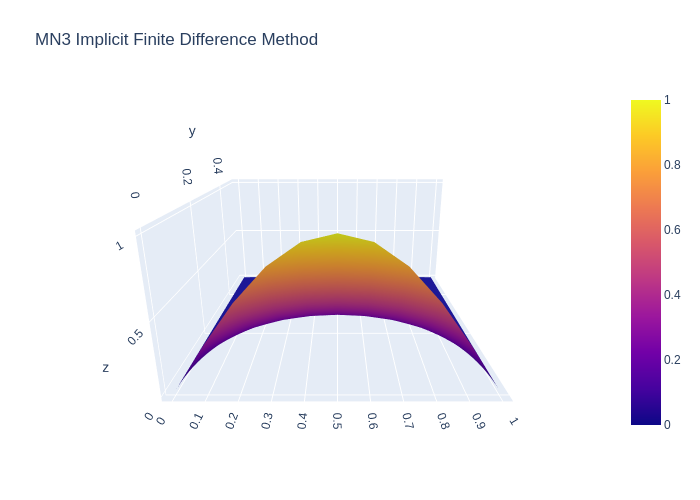

In [46]:
x = LinRange(a, b, xn+1)
y = LinRange(t_min, t_max, tn+1)
Z = vector_de_vectores = [vec(S[i, :]) for i in 1:size(S, 1)]
layout = Layout(
    title="MN3 Implicit Finite Difference Method",
    autosize=false,
    width=800,
    height=400,
    margin=attr(l=65, r=50, b=65, t=90),
    scene=attr(
            xaxis_nticks=20,
            zaxis_nticks=4,
            camera_eye=attr(x=0, y=-1.5, z=0.5),
            aspectratio=attr(x=1, y=1, z=0.5)
        )
)
Plot(surface(x=x, y=y, z=Z), layout)